In [6]:
import mglearn

In [7]:
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm

for font_path in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'D2Coding' in font_path:
        font = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font)
        break 

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LinearRegression

In [13]:
SEED = 42

# 선형 회귀

시험 공부 시간을 늘리면 성적이 잘 나온다.  
하루에 걷는 횟수를 늘리면 몸무게가 줄어든다.  
어떤 요인의 수치에 따라서 특정 요인의 수치가 영향을 받고 있다고 말할 수 있다.  
  
다른 변수의 값을 변하게 하는 변수를 x, x에 의해서 값이 변하는 변수를 y라고 한다면, x의 값은 독립적으로 변할 수 있으나, y의 값은 계속해서 x의 값에 의해 종속적으로 결정되므로,  

x를 독립변수, y를 종속변수라고 한다.

## 단순 선형 회귀 분석(Simple Linear Regression analysis)

$ y = wx + b $

y: 종속변수  
x: 독립변수  
w: 가중치(weight)  
b: 편향(bias)

## 다중 선형 회귀 분석(Multiple Linear Regression Analysis)

$ y = w_1x_1 + w_2x_2 + ... + w_nx_n + b $

종속 변수에 영향을 주는 독립 변수의 갯수가 여러 가지일 때 다중 선형 회귀 분석을 사용한다.

# 정규화(Regularization)

> 모델을 학습할 때는 비용(cost) 즉, 오류를 최소화하는 방향으로 진행된다.  

> 이 비용(cost) 혹은 손실(loss)이 얼마나 있는지 나타내는 것이 비용 함수(cost function), 손실 함수(loss function)하고 한다.

- W(weight)가 너무 큰 값들을 가지지 않도록 한다.
- W가 너무 큰 값을 갖게 되면 과하게 구불구불한 형태의 함수가 만들어지는데, Regularization은 이런 모델의 복잡도를 낮추기 위한 방법이다.
- Regularizaion은 단순하게 cost function만 작아지는 쪽으로 학습하게 되면 특정 가중치가 커지면서 결과를 나쁘게 만든다. 따라서 cost function을 바꿀 필요가 있다.

## L1 Regularization
- 가중치의 합을 더한 값에 learning rate(학습률) $\lambda$ 를 곱하여 오차에 더한다.
$$
Cost = \frac{1}{n}{\sum_{i=1}^n}\{L(y_i, \hat y_i) + \frac{\lambda}{2}|w|\}
$$
$L(y_i, \hat y_i)$: 기존의 Cost function

## L2 Regularization

- 각 가중치의 제곱의 합에 learning rate(학습률) $\lambda$ 를 곱한다.
- learning rate를 크게 하면 가중치가 더 많이 감소되고, 작게 하면 가중치가 증가한다.

> L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2 규제가 더 많이 사용된다.

$$
Cost = \frac{1}{n}{\sum_{i=1}^n}\{L(y_i, \hat y_i) + \frac{\lambda}{2}|w|^2\}
$$

# 회귀의 선형 모델

## LinearRegression

> 최소제곱법(Ordinary Least Squares)을 활용.  
> 실제 값에서 예측값을 뺀 차이의 제곱에 합

$$ \sum(y_i - f(x_i))^2

In [27]:
from sklearn.linear_model import LinearRegression

데이터 불러오기

In [28]:
X, y = mglearn.datasets.load_extended_boston()
print(f'{X.shape} / {y.shape}')

(506, 104) / (506,)


c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative d

데이터 분리

In [29]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=SEED)
print(f'X_tr.shape: {X_tr.shape}')

X_tr.shape: (379, 104)


모델 정의 및 학습

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_tr, y_tr)

LinearRegression()

In [32]:
X_tr.shape

(379, 104)

In [33]:
print(f"bias: {lr.intercept_} / weights.shape: {lr.coef_.shape} \n\nweights: {lr.coef_}")

bias: -34.707522103873885 / weights.shape: (104,) 

weights: [-5.11126504e+02  4.02559787e+00 -9.45778613e+01  1.34720251e+01
  3.48176257e+01  6.03611391e+01  3.49707471e+01  2.94114542e+00
  3.14525465e+00  8.20792132e+01  1.24254396e+01  3.86676075e+01
 -9.38409521e-01  1.32936334e+01  7.60317098e+02  1.42274855e+03
  2.29220565e+02 -7.79405429e+01  8.79429261e+01  1.39813973e+01
  1.02565346e+02  7.52178879e+02 -1.82071934e+03  5.34143172e+02
 -2.41122305e+01  1.11848898e+02 -4.38177813e+00 -1.23079894e+01
 -3.63360790e+00 -5.64878037e+01  4.60395879e-01  8.18005986e+00
 -2.06294404e+01 -3.49659791e+01  4.31717988e+01 -2.92220843e+00
  1.45250942e+01 -3.24346333e+01  3.66984591e+01 -2.75859278e+00
  6.27805740e+00  4.98379104e+01  6.55060318e+00  3.91047481e+01
 -1.14826290e+01 -8.00990322e-01 -3.68662287e+00  3.36483260e+01
 -1.49103502e+01  1.34720251e+01 -1.80244019e+01 -2.90956806e+01
 -2.78115796e+00 -1.10315060e+01  1.15584830e+00 -8.37313259e-01
 -7.89905136e+00  6.27950290e

학습한 모델을 이용한 검증 데이터 예측

In [39]:
pred = lr.predict(X_te)
pred[:5]

array([26.81684287, 35.0346683 , 13.89909514, 21.03142664, 16.32017047])

In [35]:
X_te.shape, X_tr.shape

((127, 104), (379, 104))

In [40]:
pred.shape, y_te.shape, X_te.shape

((127,), (127,), (127, 104))

모델 평가

In [41]:
print(f"훈련용 평가지표: {lr.score(X_tr, y_tr)} / 테스트용 평가지표: {lr.score(X_te, y_te)}")

훈련용 평가지표: 0.9448313975211593 / 테스트용 평가지표: 0.7758378393351704


훈련용 평가지표와 테스트용 평가지표의 값의 차이가 크므로, 이 모델은 overfitting된 모델이다.

## Ridge with L2

> 선형회귀에 L2 규제 적용

In [42]:
from sklearn.linear_model import Ridge

In [43]:
ridge = Ridge().fit(X_tr, y_tr)

In [44]:
print(f"훈련용 평가지표: {ridge.score(X_tr, y_tr)} / 테스트용 평가지표: {ridge.score(X_te, y_te)}")

훈련용 평가지표: 0.8700969775259911 / 테스트용 평가지표: 0.8145421818415552


L2 규제가 적용된 Ridge를 사용하여 적용한 결과, 훈련용 평가지표는 낮아졌지만, 테스트용 평가지표는 높아진 것을 확인할 수 있다.  

In [45]:
ridge10 = Ridge(alpha=10).fit(X_tr, y_tr)
print(f"훈련용 평가지표: {ridge10.score(X_tr, y_tr)} / 테스트용 평가지표: {ridge10.score(X_te, y_te)}")

훈련용 평가지표: 0.7669532344928074 / 테스트용 평가지표: 0.7279392273706593


In [46]:
ridge01 = Ridge(alpha=0.1).fit(X_tr, y_tr)
print(f"훈련용 평가지표: {ridge01.score(X_tr, y_tr)} / 테스트용 평가지표: {ridge01.score(X_te, y_te)}")

훈련용 평가지표: 0.9174870139232214 / 테스트용 평가지표: 0.8246491875314653


- alpha값을 낮추면 규제의 효과가 없어져 overfitting 가능성이 높아진다.
- alpha값을 높이면 훈련 세트의 성능은 낮아지지만 일반화에는 도움을 준다.

실제로 훈련지표와 테스트지표의 차이가 alpha값에 의해 변하는 것을 발견할 수 있다.

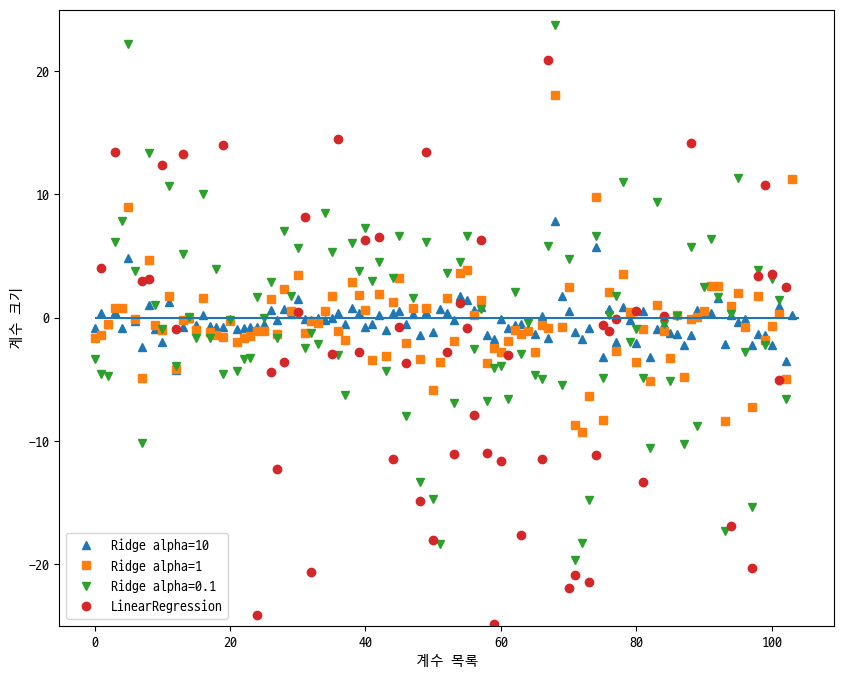

In [47]:
plt.figure(figsize=(10,8))

plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Ridge에서 alpha값이 클 수록 각각의 계수 크기가 작아지는 것을 볼 수 있다. 따라서 L2 규제가 강해진다고 할 수 있으며, 이는 overfitting 가능성이 낮아진다는 뜻이다.

하지만 alpha값을 아무리 높이더라도 Ridge의 계수 크기가 0이 되지는 않는다.

c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative d

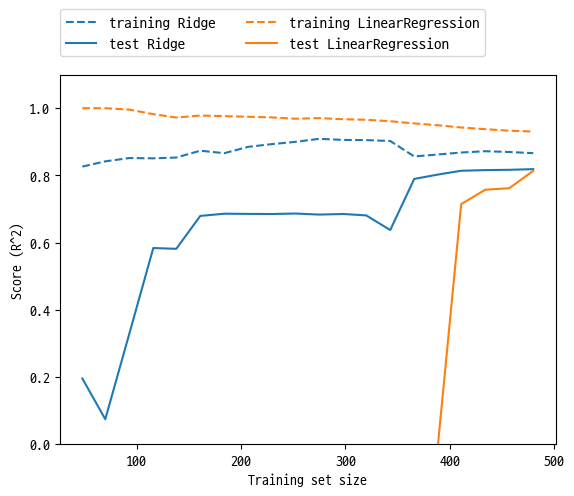

In [48]:
mglearn.plots.plot_ridge_n_samples()

데이터가 적을 때는 Ridge가 LinearRegression보다 높은 성능을 보이나, 데이터가 충분히 많아지면 Ridge와 LinearRegression의 성능이 비슷하게 수렴한다.

## Lasso with L1

> L1 규제를 사용하면, 실제로 일부 feature들의 계수(weight)가 0이 된다. 이 말은, 모델에서 완전히 제외되는 feature가 생긴다는 뜻이다.  
> 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지며, 이 모델의 가장 중요한 특성이 무엇인지 드러난다.  

alpha값을 줄이면 가장 낮은 오차를 찾아가는 반복횟수(max_iter)가 늘어나야 한다.

In [49]:
from sklearn.linear_model import Lasso

In [56]:
# Lasso 기본값
lasso = Lasso(alpha=1, max_iter=1000).fit(X_tr, y_tr)
print(f"훈련용 평가지표: {lasso.score(X_tr, y_tr)} / 테스트용 평가지표: {lasso.score(X_te, y_te)}")
print('-'*80)
print(f"사용한 특성의 수: {np.sum(lasso.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}")

훈련용 평가지표: 0.26783778369518485 / 테스트용 평가지표: 0.259923211834459
--------------------------------------------------------------------------------
사용한 특성의 수: 3 / 전체 특성 수: 104


In [52]:
# alpha값을 변경할 때는 max_iter를 증가시켜야 한다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_tr, y_tr)
print(f"훈련용 평가지표: {lasso001.score(X_tr, y_tr)} / 테스트용 평가지표: {lasso001.score(X_te, y_te)}")
print('-'*80)
print(f"사용한 특성의 수: {np.sum(lasso001.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}")

훈련용 평가지표: 0.8864717420585475 / 테스트용 평가지표: 0.8036004116583613
--------------------------------------------------------------------------------
사용한 특성의 수: 34 / 전체 특성 수: 104


In [53]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_tr, y_tr)
print(f"훈련용 평가지표: {lasso00001.score(X_tr, y_tr)} / 테스트용 평가지표: {lasso00001.score(X_te, y_te)}")
print('-'*80)
print(f"사용한 특성의 수: {np.sum(lasso00001.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}")

훈련용 평가지표: 0.9435815252488569 / 테스트용 평가지표: 0.8080525356174137
--------------------------------------------------------------------------------
사용한 특성의 수: 95 / 전체 특성 수: 104


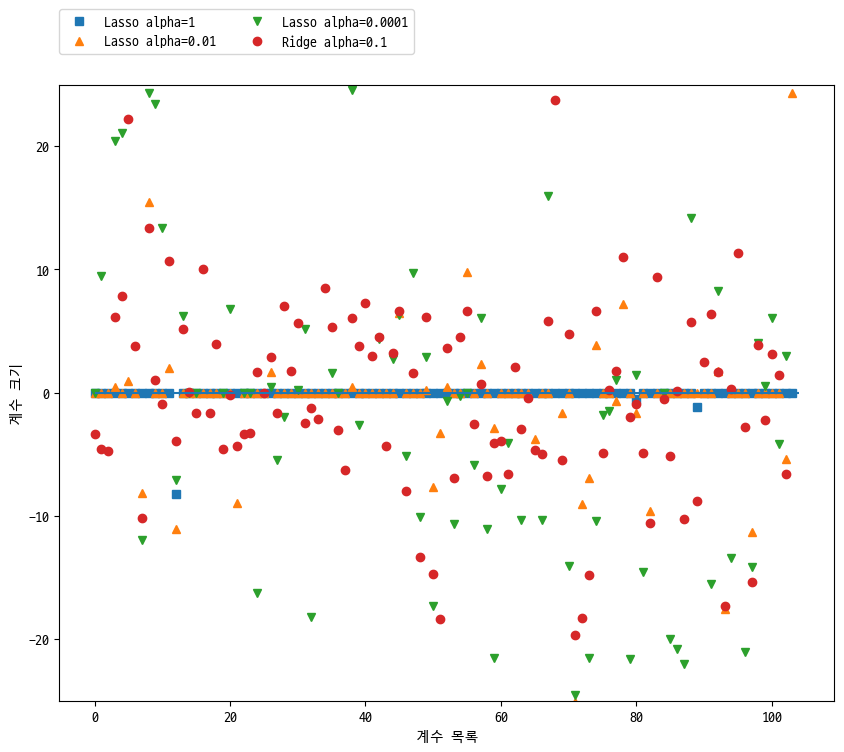

In [54]:
plt.figure(figsize=(10,8))

plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

## ElasticNet

> 선형회귀에 L1규제, L2규제를 동시에 적용한 모델이다.

- 주요 파라미터
    - alpha: 규제 계수
    - l1-ratio(기본값 0.5)
        - 0이면 L2 규제만
        - 1이면 L1 규제만
        - 0 < l1_ratio < 1이면 혼합

In [57]:
from sklearn.linear_model import ElasticNet

In [58]:
elnet = ElasticNet().fit(X_tr, y_tr)
print(f"훈련용 평가지표: {elnet.score(X_tr, y_tr)} / 테스트용 평가지표: {elnet.score(X_te, y_te)}")
print(f"사용한 특성의 수: {np.sum(elnet.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}")

훈련용 평가지표: 0.28687844662910666 / 테스트용 평가지표: 0.2958247950440561
사용한 특성의 수: 34 / 전체 특성 수: 104


In [59]:
alpha=0.01
ratios = [0.2, 0.5, 0.8]

for ratio in ratios:
    elnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=42).fit(X_tr, y_tr) 
    print(f'ratio: {ratio}')
    print(f'훈련용 평가지표: {elnet.score(X_tr, y_tr)} / 테스트용 평가지표: {elnet.score(X_te, y_te)}')
    print(f'사용한 특성의 수: {np.sum(elnet.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}')
    print('-'*50)

ratio: 0.2
훈련용 평가지표: 0.8238135742485904 / 테스트용 평가지표: 0.7795966619578516
사용한 특성의 수: 96 / 전체 특성 수: 104
--------------------------------------------------
ratio: 0.5
훈련용 평가지표: 0.8380065707292548 / 테스트용 평가지표: 0.7905653920031052
사용한 특성의 수: 82 / 전체 특성 수: 104
--------------------------------------------------
ratio: 0.8
훈련용 평가지표: 0.8597641190547214 / 테스트용 평가지표: 0.8048076661657296
사용한 특성의 수: 58 / 전체 특성 수: 104
--------------------------------------------------


c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.676e+00, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(


In [60]:
alphas=[0.001, 0.01, 0.1]
ratio = 0.8

for alpha in alphas:
    elnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=42).fit(X_tr, y_tr) 
    print(f'alpha: {alpha}')
    print(f'훈련용 평가지표: {elnet.score(X_tr, y_tr)} / 테스트용 평가지표: {elnet.score(X_te, y_te)}')
    print(f'사용한 특성의 수: {np.sum(elnet.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}')
    print('-'*50)

alpha: 0.001
훈련용 평가지표: 0.9173473687204438 / 테스트용 평가지표: 0.8248159739409675
사용한 특성의 수: 96 / 전체 특성 수: 104
--------------------------------------------------
alpha: 0.01
훈련용 평가지표: 0.8597641190547214 / 테스트용 평가지표: 0.8048076661657296
사용한 특성의 수: 58 / 전체 특성 수: 104
--------------------------------------------------
alpha: 0.1
훈련용 평가지표: 0.7196305089754125 / 테스트용 평가지표: 0.6655902838538497
사용한 특성의 수: 28 / 전체 특성 수: 104
--------------------------------------------------


c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.506e+03, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.676e+00, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(


# 분류 모델

## 분류의 선형 모델

> 이진 선형 분류기는 선, 평면, 초평면을 사용해서 2개의 클래스를 구분하는 분류기.

### 로지스틱 회귀(Logistic Regression)

- 예측 결정으로 sigmoid 함수 사용
- 이진 분류에 주로 사용
- sigmoid 함수
    - 입력값이 양수 무한대로 입력이 들어가도 1에 가깝게 출력
    - 입력값이 음수 무한대로 입력이 들어가도 0에 가깝게 출력
$$ sigmoid(x) = \frac{1}{1 + e^{-x}}$$

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [14]:
cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=SEED
)

In [22]:
logreg = LogisticRegression(C=1).fit(X_tr, y_tr)
print(f"훈련용 평가지표: {logreg.score(X_tr, y_tr)} / 테스트용 평가지표: {logreg.score(X_te, y_te)}")

훈련용 평가지표: 0.9507042253521126 / 테스트용 평가지표: 0.965034965034965


c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


훈련용 평가지표와 테스트용 평가지표의 점수가 비슷하게 나왔다.  
이는 과소적합, 즉 훈련이 덜 되었다고 해석이 가능하다.  

Hyperparameter C는 정규화(L2 규제)를 조절하는 값이다. 해당 값은 양의 실수여야 한다.
Hyperparameter C가 낮을수록 계수를 0으로 근사하므로, 정규화가 강화된다고 해석할 수 있다.

In [26]:
logreg100 = LogisticRegression(C=100).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {logreg100.score(X_tr, y_tr)} / 테스트용 평가지표: {logreg100.score(X_te, y_te)}')

훈련용 평가지표: 0.9460093896713615 / 테스트용 평가지표: 0.958041958041958


c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
logreg001 = LogisticRegression(C=0.01).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {logreg001.score(X_tr, y_tr)} / 테스트용 평가지표: {logreg001.score(X_te, y_te)}')

훈련용 평가지표: 0.9342723004694836 / 테스트용 평가지표: 0.9300699300699301


c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


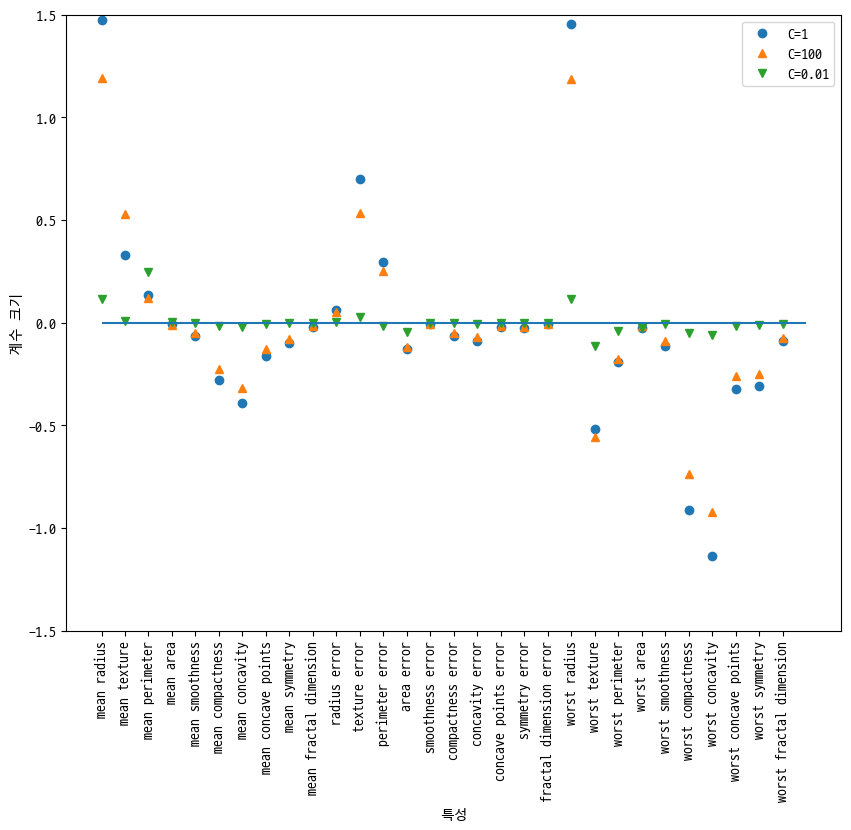

In [25]:
plt.figure(figsize=(10, 8))

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-1.5, 1.5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()